In [ ]:
# install fuzzy_expert
# Solve Air conditioner problem using Fuzzy Expert System

!pip install fuzzy_expert

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.4 MB/s eta 0:00:00
  Created wheel for fuzzy_expert: filename=fuzzy_expert-0.1.0-py3-none-any.whl size=18504 sha256=9165a85b5428540f5701cbc8e552026440b77d04a750f95b5bf892ca0ea94126
  Stored in directory: /root/.cache/pip/wheels/0a/7b/d0/c85f2208fec87eceb3147187ea91595f4ed7a5ae640e710210
Successfully built fuzzy_expert


In [2]:
import matplotlib.pyplot as pit
import numpy as np
from fuzzy_expert.variable import FuzzyVariable
from fuzzy_expert.rule import FuzzyRule
from fuzzy_expert.inference import DecompositionalInference
from ipywidgets import interact, widgets

In [7]:
vars = {
    'temp' : FuzzyVariable(
        universe_range=(0,30),
        terms={
            'cold' : [(0,1), (5,0.5), (10,0), (12.5,0), (15,0), (17.5,0), (20,0), (22.5,0), (25, 0), (27.5,0), (30,0)],
            'cool' : [(0,0), (5,0.4), (10,0.8), (12.5,1), (15,0.5), (17.5,0), (20,0), (22.5,0), (25,0), (27.5,0), (30,0)],
            'pleasant' : [(0,0), (5,0), (10,0), (12.5,0), (15,0), (17.5,1), (20,0), (22.5,0), (25,0), (27.5,0), (30,0)],
            'warm' : [(0,0), (5,0), (10,0), (12.5,0), (15,0), (17.5,0), (20,0.5), (22.5,1), (25,0.5), (27.5,0), (30,0)],
            'hot' : [(0,0), (5,0), (10,0), (12.5,0), (15,0), (17.5,0), (20,0), (22.5,0), (25,0), (27.5,0.5), (30,1)]
        }
    ),
    'fan-speed' : FuzzyVariable(
        universe_range=(0,100),
        terms={
            'minimal' : [(0,1), (10,0.7), (20,0.35), (30,0), (40,0), (50,0), (60,0), (70,0), (80,0), (90,0), (100,0)],
            'slow' : [(0,0), (10,0), (20,0.5), (30,1), (40,0.5), (50,0), (60,0), (70,0), (80,0), (90,0), (100,0)],
            'medium' : [(0,0), (10,0), (20,0), (30,0), (40,0), (50,1), (60,0), (70,0), (80,0), (90,0), (100,0)],
            'fast' : [(0,0), (10,0), (20,0), (30,0), (40,0), (50,0), (60,0.5), (70,1), (80,0.5), (90,0), (100,0)],
            'blast' : [(0,0), (10,0), (20,0), (30,0), (40,0), (50,0), (60,0), (70,0), (80,0.32), (90,0.65), (100,1)]
        }
    )
}

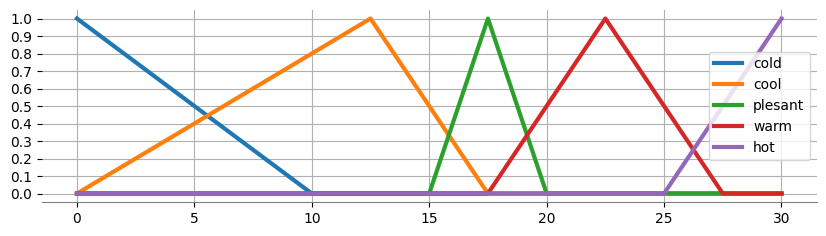

In [4]:
pit.figure(figsize=(10,2.5))
vars["temp"].plot()
pit.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
pit.grid()

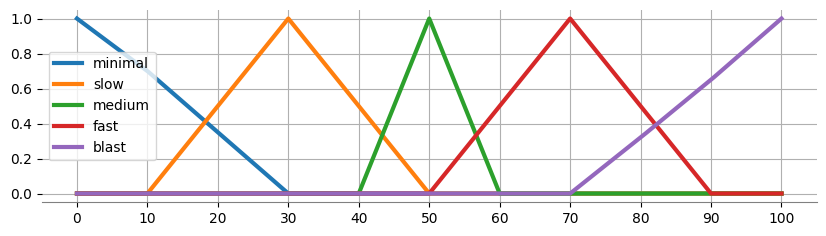

In [5]:
pit.figure(figsize=(10,2.5))
vars["fan-speed"].plot()
# Set x-axis ticks to be in intervals of 10
pit.xticks([0,10,20,30,40,50,60,70,80,90,100])
pit.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
pit.grid()

In [9]:
# define fuzzy rules

rules = [
    FuzzyRule(
        premise = [
            ('temp', 'cold'),
        ],
        consequence =  [
            ('fan-speed', 'minimal')
        ]
    ),
    FuzzyRule(
        premise = [
            ('temp', 'cool')
        ],
        consequence = [
            ('fan-speed', 'slow')
        ]
    ),
    FuzzyRule(
        premise = [
            ('temp', 'pleasant'),
        ],
        consequence = [
            ('fan-speed', 'medium')
        ]
    ),
    FuzzyRule(
        premise = [
            ('temp', 'warm')
        ],
        consequence = [
            ('fan-speed', 'fast')
        ]
    ),
    FuzzyRule(
        premise = [
            ('temp', 'hot')
        ],
        consequence = [
            ('fan-speed', 'blast')
        ]
    )
]

for rule in rules:
  print(rule)

IF  temp IS cold
THEN
    fan-speed IS minimal
CF = 1.00
Threshold-CF = 0.00

IF  temp IS cool
THEN
    fan-speed IS slow
CF = 1.00
Threshold-CF = 0.00

IF  temp IS pleasant
THEN
    fan-speed IS medium
CF = 1.00
Threshold-CF = 0.00

IF  temp IS warm
THEN
    fan-speed IS fast
CF = 1.00
Threshold-CF = 0.00

IF  temp IS hot
THEN
    fan-speed IS blast
CF = 1.00
Threshold-CF = 0.00



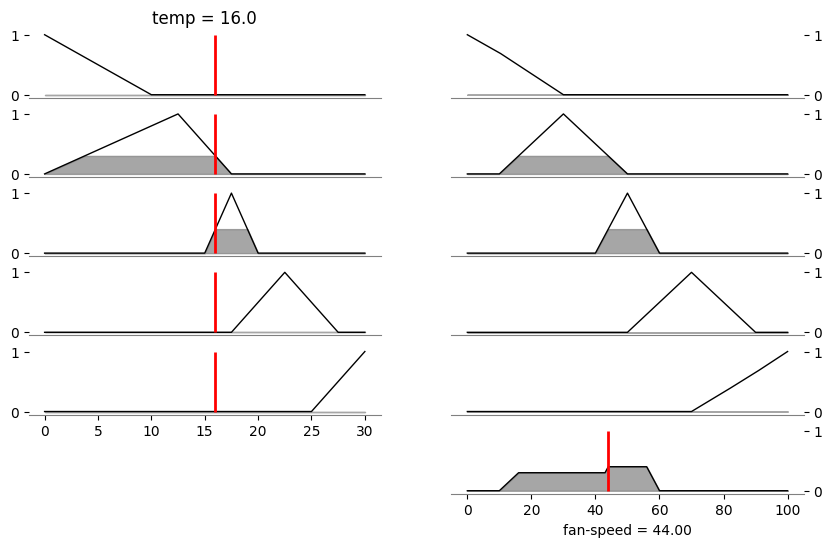

In [45]:
model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="som", # center of gravity [ instead of 'cog' ]
)

model(
    variables=vars,
    rules=rules,
    temp=16.0
)

pit.figure(figsize=(10,6))
model.plot(
    variables=vars,
    rules=rules,
    temp=16.0
)